In [11]:
from langchain_community.document_loaders import PyPDFLoader


In [175]:
loader = PyPDFLoader("tsla-20231231-gen.pdf")
docs = loader.load()

In [176]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [177]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)

In [178]:
docs = text_splitter.split_documents(docs)
texts = [doc.page_content for doc in docs]

In [179]:
texts

['UNITED\tSTATES\nSECURITIES\tAND\tEXCHANGE\tCOMMISSION\nWashington,\tD.C.\t20549\nFORM\t\n10-K\n(Mark\tOne)\nx\nANNUAL\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934\nFor\tthe\tfiscal\tyear\tended\t\nDecember\t31\n,\t2023\nOR\no\nTRANSITION\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934\nFor\tthe\ttransition\tperiod\tfrom\t_________\tto\t_________\nCommission\tFile\tNumber:\t\n001-34756\nTesla,\tInc.\n(Exact\tname\tof\tregistrant\tas\tspecified\tin\tits\tcharter)\nDelaware\n91-2197729\n(State\tor\tother\tjurisdiction\tof\nincorporation\tor\torganization)\n(I.R.S.\tEmployer\nIdentification\tNo.)\n1\tTesla\tRoad\nAustin\n,\t\nTexas\n78725\n(Address\tof\tprincipal\texecutive\toffices)\n(Zip\tCode)\n(\n512\n)\t\n516-8177\n(Registrant’s\ttelephone\tnumber,\tincluding\tarea\tcode)\nSecurities\tregistered\tpursuant\tto\tSection\t12(b)\tof\tthe\tAct:\nTitle\tof\teach\tclass\nTrading\tSymbol(s)\nName\tof\

In [180]:
import tiktoken

def num_tokens_from_string(string: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding("cl100k_base")
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [181]:
counts = [num_tokens_from_string(t) for t in texts]

<function matplotlib.pyplot.show(close=None, block=None)>

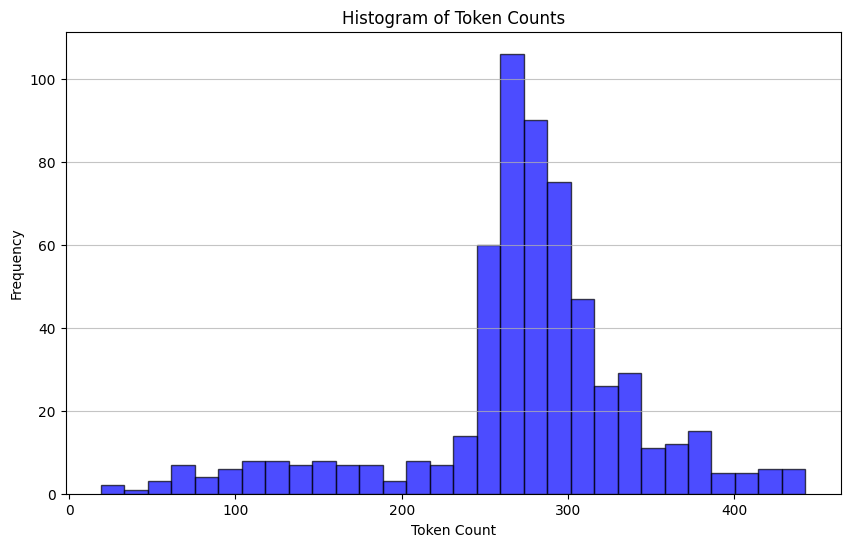

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show

In [183]:
d_sorted = sorted(docs, key=lambda x: x.metadata["source"])
d_reversed = list(reversed(d_sorted))
concatenated_content = "\n\n\n --- \n\n\n".join(
    [doc.page_content for doc in d_reversed]
)
print(
    "Num tokens in all context: %s"
    % num_tokens_from_string(concatenated_content)
)

Num tokens in all context: 163327


In [223]:
import os
import streamlit as st
from langchain_google_genai import GoogleGenerativeAIEmbeddings,GoogleGenerativeAI
os.environ["api_key"] = st.secrets["secrets"]["api_key"]

embedding_model = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=os.environ["api_key"])
model = GoogleGenerativeAI(temperature=0.0,
            model="gemini-pro",
            google_api_key=os.environ["api_key"],
            
        )

In [193]:
global_embeddings = [embedding_model.embed_query(txt) for txt in texts]

GoogleGenerativeAIError: Error embedding content: 429 Quota exceeded for quota metric 'Batch Embed Content API requests' and limit 'Batch embed contents request limit per minute for a region' of service 'generativelanguage.googleapis.com' for consumer 'project_number:399728883643'. [reason: "RATE_LIMIT_EXCEEDED"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/batch_embed_contents_requests"
}
metadata {
  key: "quota_location"
  value: "us-east2"
}
metadata {
  key: "quota_limit"
  value: "BatchEmbedContentsRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "150"
}
metadata {
  key: "consumer"
  value: "projects/399728883643"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quota#requesting_higher_quota"
}
]

In [188]:
global_embeddings[0]

[0.037836324,
 -0.011286742,
 -0.049900696,
 -0.024379281,
 0.08843479,
 0.035611387,
 0.0077021285,
 -0.0318485,
 0.0005492523,
 0.058517043,
 -0.036736093,
 0.019522345,
 -0.03060359,
 0.01479154,
 -0.013366564,
 -0.045139614,
 0.026734315,
 0.010668251,
 0.0388683,
 -0.038554598,
 0.039950293,
 0.002923053,
 -0.00946504,
 -0.016359499,
 0.010703856,
 -0.02042575,
 -0.01810559,
 -0.04626521,
 -0.024974719,
 -0.036540225,
 -0.025718031,
 -0.001184541,
 -0.059867367,
 0.04595803,
 -0.0009897228,
 -0.04568429,
 -0.02246988,
 0.02348425,
 -0.020556858,
 0.01756285,
 0.017143179,
 -0.007408655,
 -0.03185301,
 -0.012197966,
 -0.022622842,
 0.005266212,
 -0.034143392,
 0.0028393327,
 0.02767023,
 -0.079876274,
 -0.0014591584,
 0.003185836,
 0.048877854,
 -0.017982693,
 0.040531732,
 -0.03163127,
 0.033501238,
 0.0037046226,
 -0.015750023,
 0.026776072,
 -0.0019365444,
 0.0058619543,
 0.051282816,
 0.050149277,
 -0.037278775,
 -0.04011216,
 -0.04619706,
 0.013251443,
 0.044882774,
 -0.013267

In [29]:
import matplotlib.pyplot as plt
from typing import Optional
import numpy as np
import umap.umap_ as umap
def reduce_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


dim = 2
global_embeddings_reduced = reduce_cluster_embeddings(global_embeddings, dim)
global_embeddings_reduced[0]



array([ 2.404713, 10.299646], dtype=float32)

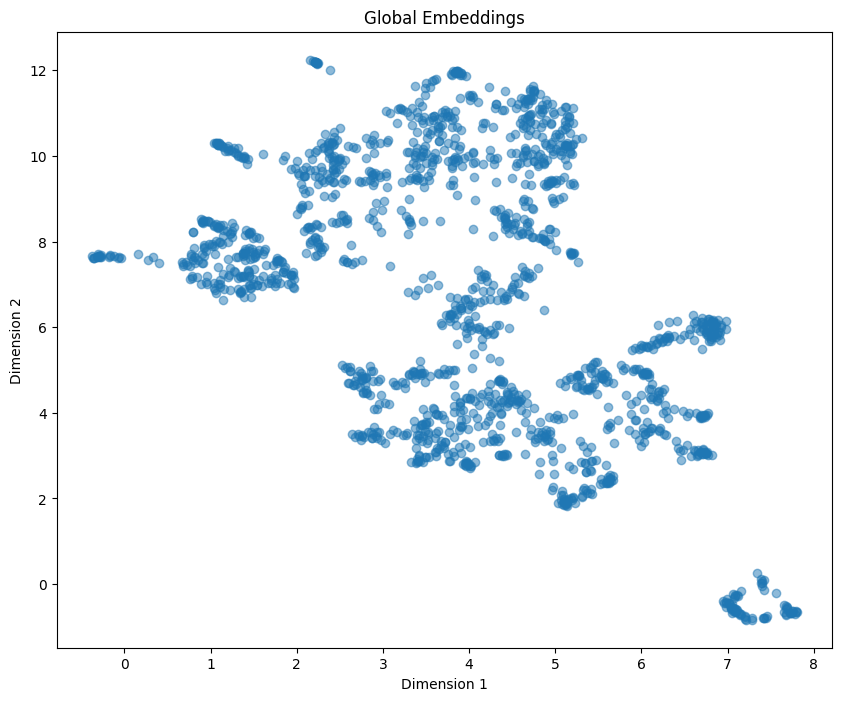

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(global_embeddings_reduced[:, 0], global_embeddings_reduced[:, 1], alpha=0.5)
plt.title("Global Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

def get_optimal_clusters(embeddings: np.ndarray, max_clusters: int = 50, random_state: int = 1234):
    max_clusters = min(max_clusters, len(embeddings))
    bics = [GaussianMixture(n_components=n, random_state=random_state).fit(embeddings).bic(embeddings)
            for n in range(1, max_clusters)]
    return np.argmin(bics) + 1

def gmm_clustering(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    n_clusters = get_optimal_clusters(embeddings)
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state).fit(embeddings)
    probs = gm.predict_proba(embeddings)
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters

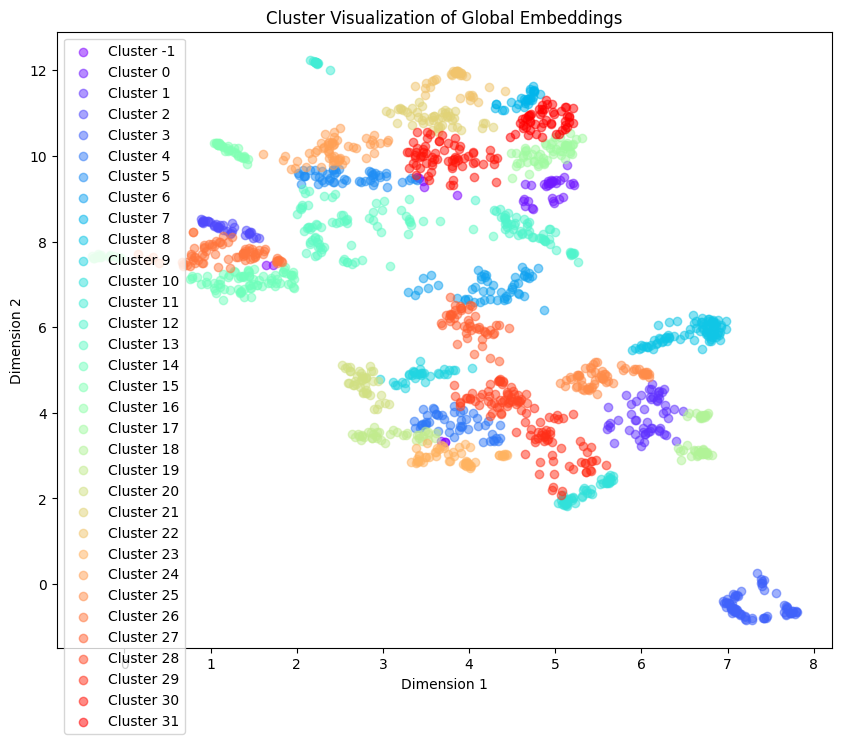

In [32]:
labels, _ = gmm_clustering(global_embeddings_reduced, threshold=0.5)

plot_labels = np.array([label[0] if len(label) > 0 else -1 for label in labels])
plt.figure(figsize=(10, 8))

unique_labels = np.unique(plot_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    mask = plot_labels == label
    plt.scatter(global_embeddings_reduced[mask, 0], global_embeddings_reduced[mask, 1], color=color, label=f'Cluster {label}', alpha=0.5)

plt.title("Cluster Visualization of Global Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [33]:
import pandas as pd

simple_labels = [label[0] if len(label) > 0 else -1 for label in labels]

df = pd.DataFrame({
    'Text': texts,
    'Embedding': list(global_embeddings_reduced),
    'Cluster': simple_labels
})
print(df.head(3))

                                                Text               Embedding  \
0  s \n \n \n \n \n \nUniversity Catalogue  \n202...   [2.404713, 10.299646]   
1  Canadian University Dubai Catalogue 21 -22 \nV...    [2.360162, 10.11625]   
2  Canadian University Dubai Catalogue 21 -22 \nV...  [2.6467898, 10.201406]   

   Cluster  
0       24  
1       24  
2       24  


In [34]:
def format_cluster_texts(df):
    clustered_texts = {}
    for cluster in df['Cluster'].unique():
        cluster_texts = df[df['Cluster'] == cluster]['Text'].tolist()
        clustered_texts[cluster] = " --- ".join(cluster_texts)
    return clustered_texts

In [35]:
clustered_texts = format_cluster_texts(df)

In [ ]:
clustered_texts

In [37]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

template = """You are an assistant to create a detailed summary of the text input prodived.
Text:
{text}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = prompt | model | StrOutputParser()

In [38]:
summaries = {}
for cluster, text in clustered_texts.items():
    summary = chain.invoke({"text": text})
    summaries[cluster] = summary


In [43]:
summaries

{24: "**Canadian University Dubai Catalogue 2022/2023**\n\n**Introduction**\n\n* Canadian University Dubai (CUD) is licensed by the UAE Ministry of Education to award degrees in higher education.\n* CUD's mission is to provide students with cultural experiences and competencies that inspire minds and transform lives.\n* CUD's goals include:\n    * Providing opportunities for students to enhance their classroom experience through technology.\n    * Evaluating the university's performance and student satisfaction.\n    * Developing the university strategically and operationally.\n* CUD's organizational structure includes a Board of Trustees, President, and various academic and administrative departments.\n\n**Academic Facilities**\n\n* CUD's classrooms are fully furnished and equipped with technology.\n* Computer laboratories are strategically placed throughout the campus.\n* The Student Lounge provides a space for students to relax and socialize.\n* The Masters Lounge offers a dedicated

In [55]:
cleaned_summaries = []
for summary in summaries.values():
    if summary:  # Check if summary is not empty
        cleaned_summaries.append(summary)
embedded_summaries = [embedding_model.embed_query(summary) for summary in cleaned_summaries]

embedded_summaries_np = np.array(embedded_summaries)

labels, _ = gmm_clustering(embedded_summaries_np, threshold=0.5)

simple_labels = [label[0] if len(label) > 0 else -1 for label in labels]

In [56]:
clustered_summaries = {}
for i, label in enumerate(simple_labels):
    if label not in clustered_summaries:
        clustered_summaries[label] = []
    clustered_summaries[label].append(list(summaries.values())[i])

In [57]:
clustered_summaries

{0: ["**Canadian University Dubai Catalogue 2022/2023**\n\n**Introduction**\n\n* Canadian University Dubai (CUD) is licensed by the UAE Ministry of Education to award degrees in higher education.\n* CUD's mission is to provide students with cultural experiences and competencies that inspire minds and transform lives.\n* CUD's goals include:\n    * Providing opportunities for students to enhance their classroom experience through technology.\n    * Evaluating the university's performance and student satisfaction.\n    * Developing the university strategically and operationally.\n* CUD's organizational structure includes a Board of Trustees, President, and various academic and administrative departments.\n\n**Academic Facilities**\n\n* CUD's classrooms are fully furnished and equipped with technology.\n* Computer laboratories are strategically placed throughout the campus.\n* The Student Lounge provides a space for students to relax and socialize.\n* The Masters Lounge offers a dedicated

In [58]:
final_summaries = {}
for cluster, texts in clustered_summaries.items():
    combined_text = ' '.join(texts)
    summary = chain.invoke({"text": combined_text})
    final_summaries[cluster] = summary

In [59]:
final_summaries

{0: "**Canadian University Dubai Catalogue 2022/2023**\n\n**Introduction**\n\n* Licensed by the UAE Ministry of Education to award degrees in higher education.\n* Mission: To provide students with cultural experiences and competencies that inspire minds and transform lives.\n* Goals:\n    * Enhance classroom experience through technology.\n    * Evaluate university performance and student satisfaction.\n    * Develop strategically and operationally.\n* Organizational Structure:\n    * Board of Trustees\n    * President\n    * Various academic and administrative departments.\n\n**Academic Facilities**\n\n* Classrooms fully furnished and equipped with technology.\n* Computer laboratories strategically placed throughout the campus.\n* Student Lounge provides a space for students to relax and socialize.\n* Masters Lounge offers a dedicated space for graduate students.\n* Sports Facilities include a gym and athletic fields.\n* Transportation services available for students from Ajman and Sh

In [60]:
texts_from_df = df['Text'].tolist()
texts_from_clustered_texts = list(clustered_texts.values())
texts_from_final_summaries = list(final_summaries.values())

combined_texts = texts_from_df + texts_from_clustered_texts + texts_from_final_summaries

In [290]:
from langchain_community.vectorstores import Chroma

# Now, use all_texts to build the vectorstore with Chroma
vectorstore = Chroma.from_texts(texts=combined_texts, embedding=embedding_model,persist_directory="./vectorstore")


TypeError: 'Chroma' object is not subscriptable

In [291]:
def adjust_final_number(string: str, max_threshold: int, initial_number: int) -> int:
    final_number = initial_number
    while final_number < max_threshold:
        retriever = vectorstore.as_retriever(search_kwargs={"k": final_number})
        docs = retriever.get_relevant_documents(string)
        text = "".join([doc.page_content for doc in docs])
        if num_tokens_from_string(text) < max_threshold:
            final_number += 1
        else:
            break
    return final_number

final_number = adjust_final_number("regarding the third semester, how many courses should I take as a computer science student? ", 15000, 4)


In [292]:
final_number

76

In [293]:
retriever=vectorstore.as_retriever(search_kwargs={"k": final_number})

In [294]:
from langchain_core.runnables import RunnablePassthrough

template = """
Answer the question based ONLY on the following context:
{context}

Answer the following question:
Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [295]:
# Question
rag_chain.invoke("what is the longest bachelor program in the university?")

'The context does not mention anything about the number of courses a computer science student should take in the third semester, so I cannot answer this question from the provided context.'